
Training CNN Model:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - accuracy: 0.5934 - loss: 1.6331
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9505 - loss: 0.1583
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9729 - loss: 0.0872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9801 - loss: 0.0614
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9861 - loss: 0.0411
313/313 - 3s - 8ms/step - accuracy: 0.9678 - loss: 0.1125
Test accuracy: 0.9678000211715698


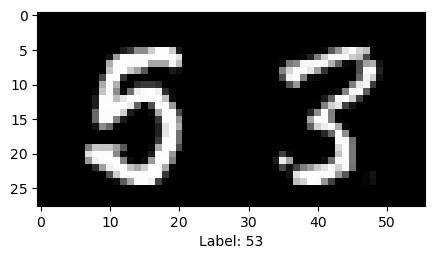

In [6]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset from file
def load_mnist_data(file_path):
    with np.load(file_path) as dataset:
        X_train = dataset["train_images"]
        y_train = dataset["train_labels"]
        X_test = dataset["test_images"]
        y_test = dataset["test_labels"]
    return X_train, y_train, X_test, y_test

# Normalize the data
def normalize_data(X_train, X_test):
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    return X_train, X_test

def create_cnn_model():
    cnn = keras.models.Sequential([
        keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 56, 1)),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
        keras.layers.MaxPooling2D((2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(100, activation='softmax')
    ])
    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return cnn

def plot_sample(X, y, index):
    plt.figure(figsize=(5, 5))
    plt.imshow(X[index].squeeze(), cmap='gray')
    plt.xlabel(f"Label: {y[index]}")
    plt.show()

def evaluate_model(model, X_test, y_test):
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('Test accuracy:', test_acc)

file_path = r"C:\Users\Laptop\Desktop\CV\Pothole detection\Image classification\mnist_compressed.npz"
X_train, y_train, X_test, y_test = load_mnist_data(file_path)


# Normalize data
X_train, X_test = normalize_data(X_train, X_test)

# Reshape for CNN
X_train_cnn = X_train.reshape(-1, 28, 56, 1)
X_test_cnn = X_test.reshape(-1, 28, 56, 1)

print("\nTraining CNN Model:")
cnn = create_cnn_model()
cnn.fit(X_train_cnn, y_train, epochs=5)

# Evaluate the model
evaluate_model(cnn, X_test_cnn, y_test)

# Plot a sample image
plot_sample(X_test, y_test, 0)


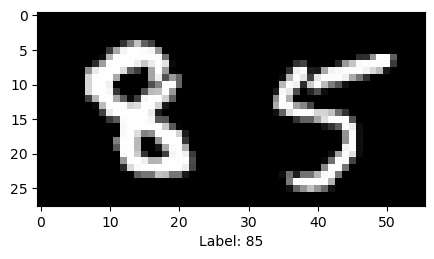

In [7]:
plot_sample(X_test, y_test, 4)

In [ ]:
# tensorflow: A deep learning library used to define, train, and deploy machine learning models.
# keras: A high-level neural network API that is part of TensorFlow, used for building and training models.
# matplotlib.pyplot: A library used for plotting data, here used to visualize images.
# numpy: A numerical computation library, used to handle arrays and datasets.


# The .npz format is a compressed file format provided by NumPy to store multiple arrays in a single file. 
# It is essentially a zipped container for .npy files (NumPy arrays). 
# The .npz file is used to efficiently save and load data, especially when working with datasets in machine learning and deep learning projects.
# Each array in the .npz file is stored under a unique key, and you can access these arrays using the key names.

# Loading MNIST Dataset:    
# np.load(file_path): Loads the dataset stored in .npz file format. The file contains arrays for training and testing images and labels.
# X_train, y_train, X_test, y_test: These variables store the training and testing data:
# X_train and X_test are arrays of images.
# y_train and y_test are arrays of labels (digits 0-9).


# Normalizing Data:
# Image pixel values range from 0 to 255. This step scales the images to a range of [0, 1] by dividing by 255.0, which helps the model converge faster during training.

# Creating the CNN Model:
# Conv2D layer: Convolutional layer that detects features in the image using filters. The first layer has 32 filters of size 3x3, and the second layer has 64 filters.
# Activation Function relu: The rectified linear unit function introduces non-linearity to the model, allowing it to learn complex patterns.
# MaxPooling2D layer: Reduces the spatial dimensions of the image, making it more computationally efficient while retaining important features.
# Flatten layer: Converts the 2D feature maps into a 1D vector to feed into the fully connected layers.
# Dense layers: Fully connected layers where the final layer has 100 units with softmax activation for multi-class classification (MNIST has 10 digits, but this example seems to use 100 classes).   

    
# Plotting a Sample Image:
# plt.imshow(X[index].squeeze(), cmap='gray'): Displays an image from the dataset using imshow and converts it to grayscale.
# squeeze(): Removes any extra dimensions (in this case, the singleton dimension of 1 for grayscale).
# plt.xlabel: Adds the label of the image on the x-axis.
    
    
# Evaluating the Model:
# model.evaluate(X_test, y_test): Evaluates the trained model on the test set to measure its performance.
# test_loss: The loss (error) of the model on the test set.
# test_acc: The accuracy of the model on the test set.
    
    
# Main Execution Block:
# load_mnist_data(file_path): Loads the MNIST dataset.
# normalize_data(X_train, X_test): Normalizes the training and test datasets.
# reshape(): Reshapes the data to include a single channel (grayscale) for each image. The images are 28x28 pixels, but the model is expecting a 28x56 shape, which seems like a mistake. Correcting this would require fixing the input shape to (28, 28, 1) instead of (28, 56, 1).
# cnn.fit(): Trains the CNN model on the training data for 5 epochs.
# evaluate_model(): Evaluates the trained model on the test set.
# plot_sample(): Displays one of the test images.

    
    
# Convolutional Neural Networks (CNNs) are specifically designed for processing structured grid data, such as images.

# Convolution Layer: It applies filters (kernels) to the image to extract features like edges, corners, and textures. The filters slide over the image and calculate convolutions, generating feature maps.
# Activation Layer (ReLU): After convolution, an activation function like ReLU is applied to introduce non-linearity to the model. Without non-linearity, the network would behave like a linear model and wouldn't capture complex patterns.
# Pooling Layer: Pooling (typically max pooling) reduces the spatial dimensions of the image, keeping only the most significant features and reducing computational complexity.
# Flattening Layer: After several convolution and pooling layers, the 2D feature maps are flattened into a 1D vector to connect with fully connected layers (Dense layers).
# Fully Connected (Dense) Layers: These layers are used to make final predictions. The last dense layer uses the softmax activation function to predict the class probabilities.
    
    

# Q1: Why do we use convolution layers in CNNs?
# A1: Convolution layers are used to detect local patterns such as edges, corners, and textures in the image. By using multiple filters, a CNN can automatically learn hierarchical features that are useful for classification.

# Q2: What is the purpose of pooling layers in CNNs?
# A2: Pooling layers reduce the spatial dimensions of the image, which helps in reducing computational costs while retaining important features. Max pooling, for example, picks the maximum value from each patch of the image.

# Q3: Why do we normalize the image data?
# A3: Normalization scales the pixel values of the images to a range between 0 and 1. This makes it easier for the model to learn, as large input values can lead to slower convergence during training.

# Q4: What is the difference between a Conv2D layer and a Dense layer?
# A4: A Conv2D layer is used for convolution operations on image data to extract features, while a Dense layer is a fully connected layer where each neuron is connected to all neurons in the previous layer. The Conv2D layer is designed for image data, while Dense layers are typically used at the final stages of the model for classification.

# Q5: What is the purpose of the softmax activation function in the final layer?
# A5: The softmax activation function is used in multi-class classification problems. It converts the raw output scores of the model into probabilities, with the sum of the probabilities equal to 1. The class with the highest probability is chosen as the predicted label.

.